In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename = 'agent_log_4'
vid = False

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [2]:
df = pd.read_csv("output/" + filename + ".csv")
n = len(df["type"].unique())
colors = plt.cm.viridis(np.linspace(0, 1, n))

In [3]:
counts_per_type = []
for tp in sorted(df["type"].unique()):
    nums = []
    nums = [
        len(df[(df["tick"] == i) & (df["type"] == tp)]) for i in df["tick"].unique()
    ]
    counts_per_type.append(nums)

In [4]:
print(
    "OGs at tick = 0: ",
    len(df[df["tick"] == 0]),
    "\t\tOGs at tick = ",
    df["tick"].max(),
    ": ",
    len(df[df["tick"] == df["tick"].max()]),
)

OGs at tick = 0:  800 		OGs at tick =  199 :  942


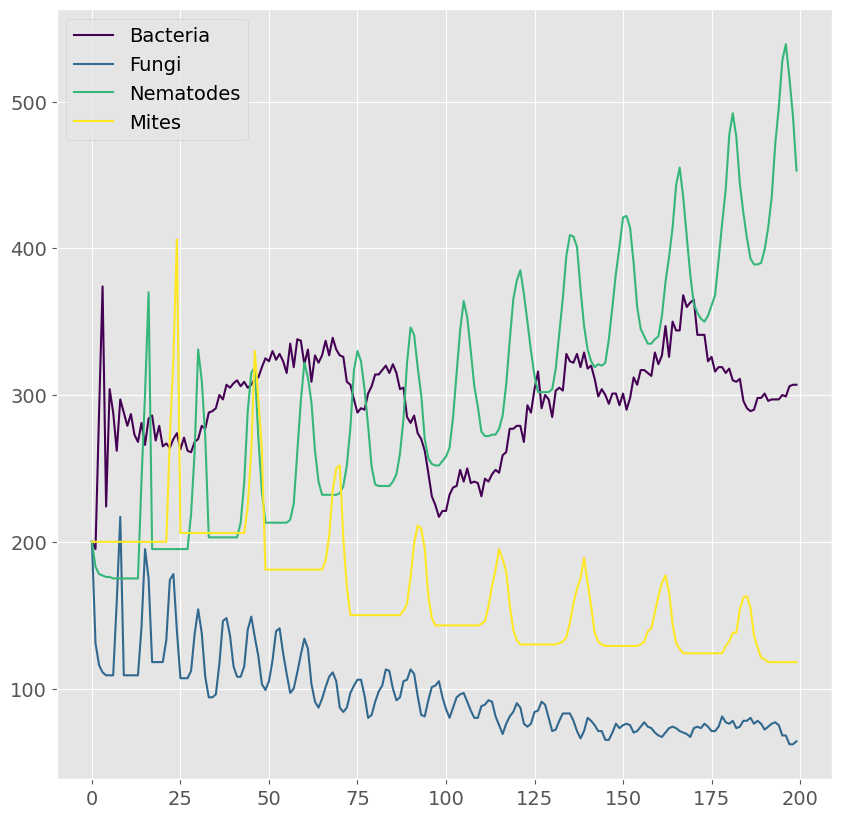

In [5]:
organism_group_labels = ["Bacteria", "Fungi", "Nematodes", "Mites"]

plt.style.use("ggplot")
plt.figure(figsize=(10, 10))

for i in range(len(counts_per_type)):
    plt.plot(
        range(len(df["tick"].unique())),
        counts_per_type[i],
        label=organism_group_labels[i],
        color=colors[i],
    )

plt.legend()
plt.show()

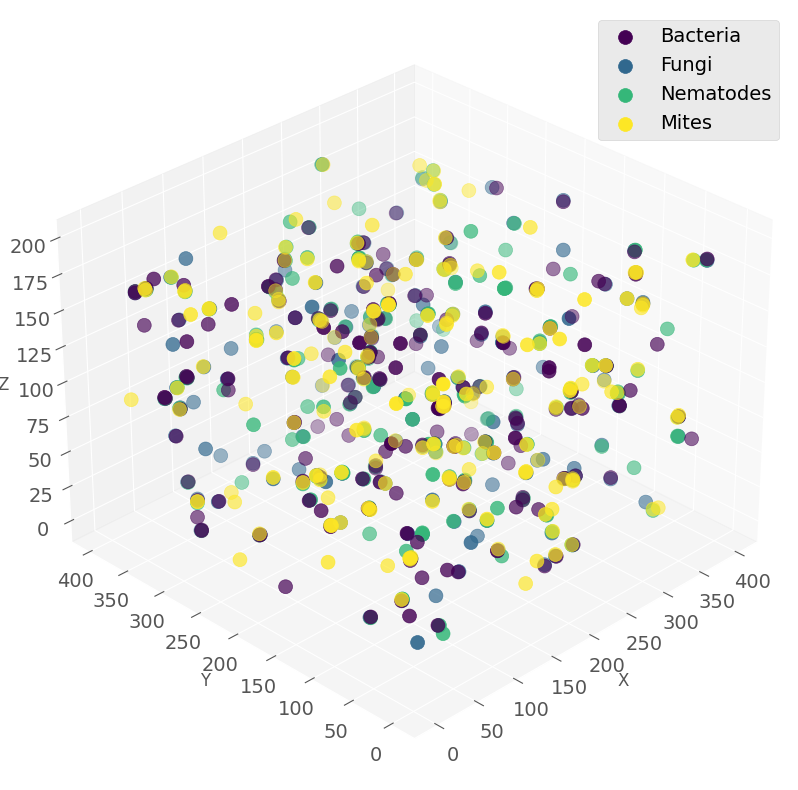

In [6]:
plt.style.use("ggplot")
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.view_init(30, 225)

df1 = df[df["tick"] == 0]

for g in np.unique(df1["type"]):
    ix = np.where(df1["type"] == g)
    ax.scatter(
        df1.iloc[ix]["x"],
        df1.iloc[ix]["y"],
        df1.iloc[ix]["z"],
        color=colors[g],
        label=organism_group_labels[g],
        s=100,
    )

ax.legend()
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.set_facecolor("white")

plt.show()

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation


def update(t):
    ax.cla()
    data = df[df["tick"] == t]

    for g in np.unique(data["type"]):
        ix = np.where(data["type"] == g)
        ax.scatter(
            data.iloc[ix]["x"],
            data.iloc[ix]["y"],
            data.iloc[ix]["z"],
            color=colors[g],
            label=organism_group_labels[g],
            s=50,
        )

    ax.set_xlim(0, 400)
    ax.set_ylim(0, 400)
    ax.set_zlim(0, 200)

    ax.legend()
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")


if vid:
    plt.style.use("ggplot")
    fig = plt.figure(figsize=(10, 10), dpi=150)
    ax = fig.add_subplot(projection="3d")
    ax.view_init(30, 225)
    ax.set_facecolor("white")

    ani = FuncAnimation(fig=fig, func=update, frames=df["tick"].max(), interval=100)

    ani.save("viz/" + filename + ".mp4")

    plt.show()